In [1]:
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings('once')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap, LogNorm # norm=LogNorm(), 
import os

In [3]:
sns.set_theme()
sns.set(font="Ubuntu")

In [4]:
colors = {'gold': '#FFD700', 'silver': '#C0C0C0', 'bronze': '#CC9966', 'total': '#EAECF0'}

In [5]:
def to_categories(df):
    type_dict = dict.fromkeys(df.select_dtypes('object'), 'category')
    return df.astype(type_dict)

def to_object(df):
    type_dict = dict.fromkeys(df.select_dtypes('category'), 'object')
    return df.astype(type_dict)

In [6]:
athletes = pd.read_csv('data/athletes_updated.csv')
athletes = to_object(athletes)
athletes_roles = pd.read_csv('data/athletes_roles.csv')
noc_countries = pd.read_csv('data/noc_countries.csv', index_col='noc')
games = pd.read_csv('data/games.csv')

In [7]:
athletes.head()

,id,name,gender,born,died,height,weight,team,game,noc,sport,event,medal
0,131892,Meryem Erdoğan,Female,1990-04-24,NaN,172.0,55.0,Türkiye,2016 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN
1,131892,Meryem Erdoğan,Female,1990-04-24,NaN,172.0,55.0,Türkiye,2020 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN
2,131892,Meryem Erdoğan,Female,1990-04-24,NaN,172.0,55.0,Türkiye,2020 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN
3,4300,Maurice Maina,Male,1963-01-01,NaN,158.0,47.0,Kenya,1988 Summer Olympics,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",NaN
4,4300,Maurice Maina,Male,1963-01-01,NaN,158.0,47.0,Kenya,1988 Summer Olympics,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",NaN


In [8]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476348 entries, 0 to 476347
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      476348 non-null  int64  
 1   name    476348 non-null  object 
 2   gender  476348 non-null  object 
 3   born    466954 non-null  object 
 4   died    115968 non-null  object 
 5   height  348837 non-null  float64
 6   weight  339742 non-null  float64
 7   team    476348 non-null  object 
 8   game    476348 non-null  object 
 9   noc     476348 non-null  object 
 10  sport   476348 non-null  object 
 11  event   476348 non-null  object 
 12  medal   66026 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 47.2+ MB


In [9]:
athletes_roles.head()

,id,name,roles
0,131892,Meryem Erdoğan,Competed in Olympic Games
1,4300,Maurice Maina,Competed in Olympic Games
2,60239,Stanislav Tůma,Competed in Olympic Games
3,129369,Eunice Kirwa,Competed in Olympic Games
4,142670,Sinem Kurtbay,Competed in Olympic Games


In [10]:
noc_countries.head()

,country
noc,
AFG,Afghanistan
ALB,Albania
ALG,Algeria
ASA,American Samoa
AND,Andorra


In [11]:
games.head()

,game,host_city,noc,year,season,competition
0,2034 Winter Olympics,Salt Lake City,USA,2034,Winter,Olympics
1,2032 Summer Olympics,Brisbane,AUS,2032,Summer,Olympics
2,2030 Winter Olympics,French Alps,FRA,2030,Winter,Olympics
3,2028 Summer Olympics,Los Angeles,USA,2028,Summer,Olympics
4,2026 Winter Olympics,Milano-Cortina d'Ampezzo,ITA,2026,Winter,Olympics


## Wordclouds

In [12]:
from wordcloud import WordCloud
from PIL import Image

In [13]:
olympics_logo = np.array(Image.open("logo_paris_2024.svg.png"))
olympics_mask = olympics_logo.copy()

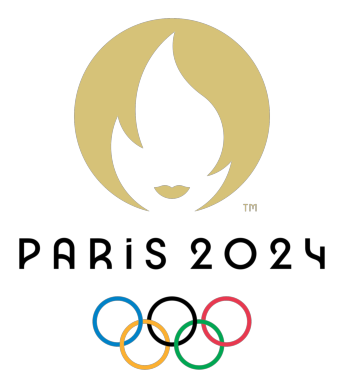

In [14]:
plt.imshow(olympics_logo)
plt.axis("off")
plt.show()

In [15]:
logo_color = olympics_logo[250,1000].copy()
logo_color

array([214, 194, 120, 255], dtype=uint8)

In [16]:
olympics_mask[olympics_mask != logo_color] = 255
olympics_mask[olympics_mask == logo_color] = 0

In [17]:
sports = athletes['sport'].unique()
color_func = lambda *args, **kwargs: "rgb({}, {}, {})".format(*[158, 141, 70, 255])
wordcloud = WordCloud(background_color="rgba(214, 194, 120, 0)", mode="RGBA", mask=olympics_mask)
wordcloud = wordcloud.generate(' '.join(sports))
wordcloud = wordcloud.recolor(color_func=color_func)

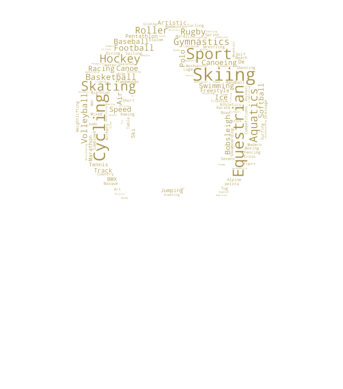

In [18]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
wordcloud.to_file('logo_paris_2024_wordcloud_mask.png')

In [20]:
olympics_wordcloud = np.array(Image.open("logo_paris_2024_wordcloud_mask.png"))

In [21]:
olympics_logo = np.array(Image.open("logo_paris_2024.svg.png"))
cond = (olympics_logo[:, :, :3] == logo_color[:3])
olympics_logo[:, :, :3][cond] = olympics_wordcloud[:, :, :3][cond]

In [22]:
im = Image.fromarray(olympics_logo)
im.save("logo_paris_2024_wordcloud.png")

(-0.5, 1799.5, 2053.5, -0.5)

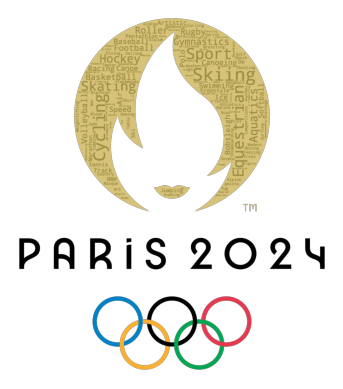

In [23]:
plt.imshow(olympics_logo)
plt.axis("off")

## Number of medals in 2020

In [24]:
sub_athletes = athletes[(athletes['medal'].notnull()) & (athletes['game'] == '2020 Summer Olympics') & (athletes['medal'] == 'Gold')]
sub_athletes.drop_duplicates(subset=['event', 'medal'], inplace=True) # Remove team duplicates
sub_count = sub_athletes['noc'].value_counts()
top_gold_medals = sub_count.reset_index(name='medal')
top_gold_medals = top_gold_medals.merge(noc_countries, on='noc', how='left')
top_countries = top_gold_medals.sort_values(by='medal', ascending=False)

(17.5, -0.5)

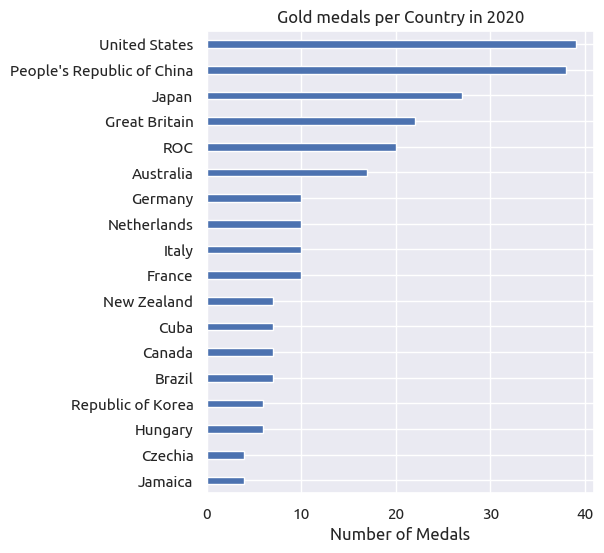

In [25]:
fig, ax = plt.subplots(figsize=(5,6))
plt.barh(y="country", width="medal", data=top_gold_medals, height=.3)
ax.invert_yaxis()
plt.xlabel("Number of Medals")
plt.title('Gold medals per Country in 2020')
ax.set_ylim(17.5, -.5)

In [26]:
sub_games = games[(games['competition'] == 'Olympics') & (games['season'] == 'Summer')]
sub_count = sub_games['noc'].value_counts()
top_hoster = sub_count.reset_index(name='host_summer').set_index('noc')
sub_games = games[(games['competition'] == 'Olympics') & (games['season'] == 'Winter')]
sub_count = sub_games['noc'].value_counts()
top_hoster['host_winter'] = sub_count
sub_count = games['noc'].value_counts()
top_hoster['total'] = sub_count
top_hoster.sort_values(by=['total', 'host_summer', 'host_winter'], ascending=False, inplace=True)

top_hoster = top_hoster.merge(noc_countries, on='noc', how='left') # we add the metadata using the noc identifier

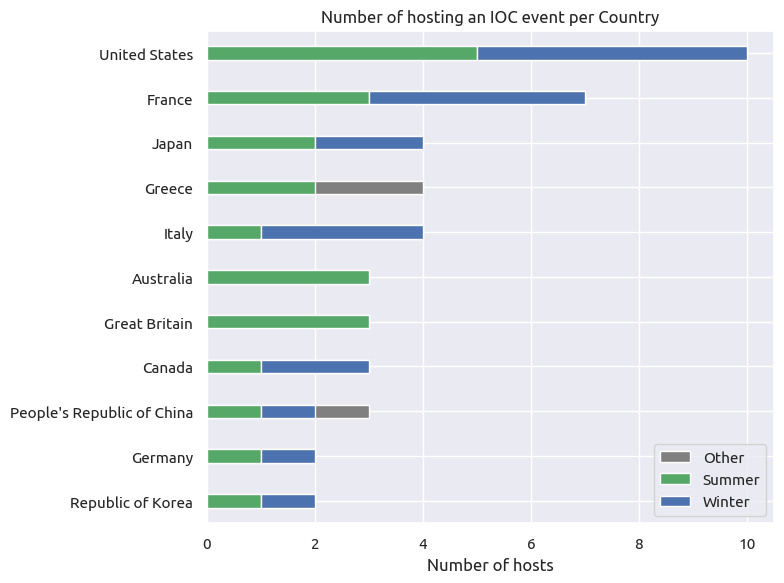

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.barh(y='country', width="total", data=top_hoster, height=.3, color='grey', label='Other')
plt.barh(y='country', width="host_summer", data=top_hoster, height=.3, color='g', label='Summer')
plt.barh(y='country', width="host_winter", left="host_summer", data=top_hoster, height=.3, color='b', label='Winter')
ax.invert_yaxis()
plt.xlabel("Number of hosts")
#plt.ylabel("Country")
plt.title('Number of hosting an IOC event per Country')
plt.legend()
ax.set_ylim(10.5, -.5)
plt.tight_layout()

In [28]:
#sub_athletes = athletes[(athletes['medal'].notnull()) & (athletes['season'] == 'Summer') & (athletes['competition'] == 'Olympics')]
sub_games = games[(games['season'] == 'Summer') & (games['competition'] == 'Olympics')]
sub_games.sort_values('year', inplace=True)

sub_athletes = athletes[(athletes['medal'].notnull()) & athletes['game'].isin(sub_games['game'])]
medals_country_year = pd.DataFrame()
for row in sub_games.iterrows():
    index, game = row
    sub_year = sub_athletes[sub_athletes['game'] == game['game']]
    sub_year.drop_duplicates(subset=['event', 'medal'], inplace=True) # Remove team duplicates
    top_medals = sub_year['noc'].value_counts().reset_index(name='total')
    #top_medals = top_medals.set_index('noc')
    for medal in sub_year['medal'].unique():
        sub_count = sub_year[sub_year['medal'] == medal]['noc'].value_counts()
        top_medals = top_medals.merge(sub_count.reset_index(name=f'medal_{medal.lower()}'), on='noc', how='left')
        top_medals.fillna(0, inplace=True)
    top_medals['year'] = game['year'] # pd.to_datetime(year, format='%Y')
    top_medals['event_total'] = top_medals['total'].sum()
    medals_country_year = pd.concat([medals_country_year, top_medals])
medals_country_year = medals_country_year.merge(noc_countries, on='noc', how='left')

In [29]:
noc = 'FRA'
medals_year = medals_country_year[medals_country_year['noc'] == noc]
#medals_year.sort_values('year', inplace=True)
medals_year = medals_year.set_index(pd.to_datetime(medals_year['year'], format='%Y'))
medals_year.sort_index(inplace=True)

# Interpolation
medals_year_interpo = medals_year.resample('MS') # resample with nan
medals_year_interpo = medals_year_interpo.interpolate(method='cubic') # interpolation
medals_year_interpo['medal_gold'][medals_year_interpo['medal_gold'] < 0] = 0 # remove negative values
medals_year_interpo['medal_silver'][medals_year_interpo['medal_silver'] < 0] = 0 # remove negative values
medals_year_interpo['medal_bronze'][medals_year_interpo['medal_bronze'] < 0] = 0 # remove negative values

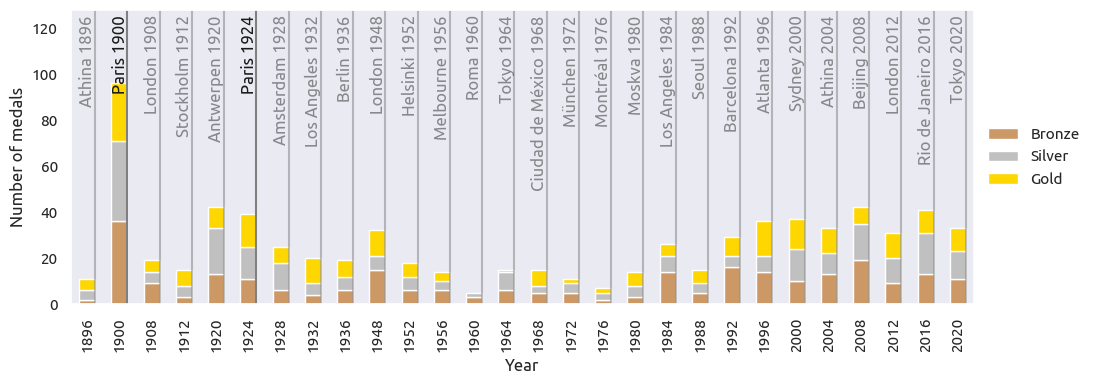

In [30]:
fig, ax = plt.subplots(figsize=(10, 4))
#medals_year['year_str'] = medals_year.index.strftime('%Y')
m = medals_year_interpo['total'].max()*1.2

k = 0
for row in sub_games['year'].items(): # host cities & games year
    index, year = row
    if medals_year[medals_year['year'] == year].empty:
        continue
    host = sub_games.loc[index]
    label = f"{host['host_city']} {host['year']}"
    if host['noc'] == noc:
        plt.axvline(k+.25, linestyle='-', color='grey')
        plt.text(k-.25, m*1.08, label, rotation=90, color='k',
                 verticalalignment='top', horizontalalignment='left')
    else:
        plt.axvline(k+.25, color='grey', linestyle='-', alpha=.5)
        plt.text(k-.25, m*1.08, label, rotation=90, alpha=.5,
                 verticalalignment='top', horizontalalignment='left')
    k+=1
    
medals_year.plot(x='year', y=["medal_bronze", "medal_silver", "medal_gold"], 
                        color=[colors['bronze'], colors['silver'], colors['gold']], 
                        label=["Bronze", "Silver", "Gold"],
                        kind="bar", stacked=True, ax=ax)
            
ax.grid(False)
ax.set_xlabel('Year')
ax.set_ylabel('Number of medals')
ax.set_ylim(0, m*1.1)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.tight_layout()

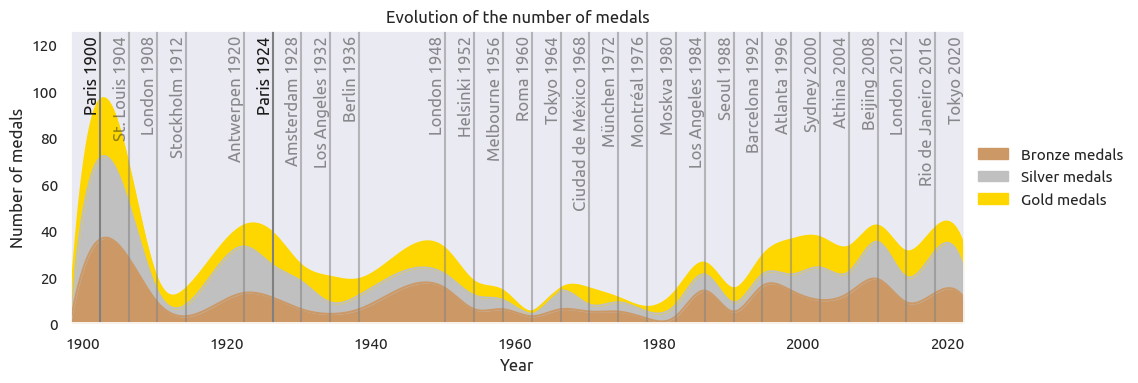

In [31]:
fig, ax = plt.subplots(figsize=(10, 4))

colors_iter = iter(sns.color_palette())
lim = medals_year.index[0], medals_year.index[-1]

m = medals_year_interpo['total'].max()

medals_year_interpo.plot.area(y=["medal_bronze", "medal_silver", "medal_gold"], 
                             color=[colors['bronze'], colors['silver'], colors['gold']], 
                             label=["Bronze medals", "Silver medals", "Gold medals"], ax=ax, x_compat=True)
    
for row in pd.to_datetime(sub_games['year'], format='%Y').items(): # host cities & games year
    index, year = row
    if lim[0] < year and year <= lim[1]: # omit first
        host = sub_games.loc[index]
        label = f"{host['host_city']} {host['year']}"
        if host['noc'] == noc:
            plt.axvline(year, linestyle='-', color='grey')
            plt.text(year, m*1.28, label, rotation=90, color='k',
                     verticalalignment='top', horizontalalignment='right')
        else:
            plt.axvline(year, color='grey', linestyle='-', alpha=.5)
            plt.text(year, m*1.28, label, rotation=90, alpha=.5,
                     verticalalignment='top', horizontalalignment='right')

    
ax.grid(False)
plt.title('Evolution of the number of medals')
ax.set_xlabel('Year')
ax.set_ylabel('Number of medals')
ax.set_xlim(lim)
ax.set_ylim(0, m*1.3)
ax.tick_params(axis='x', rotation=0)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.tight_layout()
plt.show()

In [32]:
sub_games = games[(games['competition'] == 'Olympics') & (games['season'] == 'Summer')]

for noc in sub_games['noc'].unique():
    country = noc_countries.loc[noc]['country']
    medals_year = medals_country_year[medals_country_year['noc'] == noc]
    medals_year = medals_year.set_index(pd.to_datetime(medals_year['year'], format='%Y'))
    medals_year.sort_index(inplace=True)
    
    # Interpolation
    medals_year_interpo = medals_year.resample('MS') # resample with nan
    medals_year_interpo = medals_year_interpo.interpolate(method='cubic') # interpolation
    medals_year_interpo['medal_gold'][medals_year_interpo['medal_gold'] < 0] = 0 # remove negative values
    medals_year_interpo['medal_silver'][medals_year_interpo['medal_silver'] < 0] = 0 # remove negative values
    medals_year_interpo['medal_bronze'][medals_year_interpo['medal_bronze'] < 0] = 0 # remove negative values

    fig, ax = plt.subplots(figsize=(10, 4))

    colors_iter = iter(sns.color_palette())
    lim = medals_year.index[0], medals_year.index[-1]
    m = medals_year_interpo['total'].max()

    medals_year_interpo.plot.area(y=["medal_bronze", "medal_silver", "medal_gold"], 
                                 color=[colors['bronze'], colors['silver'], colors['gold']], 
                                 label=["Bronze medals", "Silver medals", "Gold medals"], ax=ax, x_compat=True)

    for row in pd.to_datetime(sub_games['year'], format='%Y').items(): # host cities & games year
        index, year = row
        if lim[0] < year and year <= lim[1]: # omit first
            host = sub_games.loc[index]
            label = f"{host['host_city']} {host['year']}"
            if host['noc'] == noc:
                plt.axvline(year, linestyle='-', color='grey')
                plt.text(year, m*1.28, label, rotation=90, color='k',
                         verticalalignment='top', horizontalalignment='right')
            else:
                plt.axvline(year, color='grey', linestyle='-', alpha=.5)
                plt.text(year, m*1.28, label, rotation=90, alpha=.5,
                         verticalalignment='top', horizontalalignment='right')


    ax.grid(False)
    plt.title(f'Evolution of the number of medals of {country}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of medals')
    ax.set_xlim(lim)
    ax.set_ylim(0, m*1.3)
    ax.tick_params(axis='x', rotation=0)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
    plt.savefig(f'graphs/medals-country/medals-{noc}.png')
    plt.clf()

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

In [33]:
medals_country_year['host'] = False
for row in games.iterrows():
    index, values = row
    cond = (medals_country_year['year'] == values['year']) & (medals_country_year['noc'] == values['noc'])
    medals_country_year.loc[cond, 'host'] = True

In [34]:
mean_medals = pd.DataFrame(index=medals_country_year['noc'].unique())
mean_medals.index.name = 'noc'
for name, group in medals_country_year.groupby('noc'):
    mean_medals.loc[name, 'total'] = group['total'].sum()
    mean_medals.loc[name, 'mean'] = group['total'].mean()
    mean_medals.loc[name, 'mean_host'] = group.loc[group['host']]['total'].mean()
mean_medals.sort_values('mean', ascending=False, inplace=True)
mean_medals = mean_medals.merge(noc_countries, on='noc', how='left')

Text(0, 0.5, 'Country')

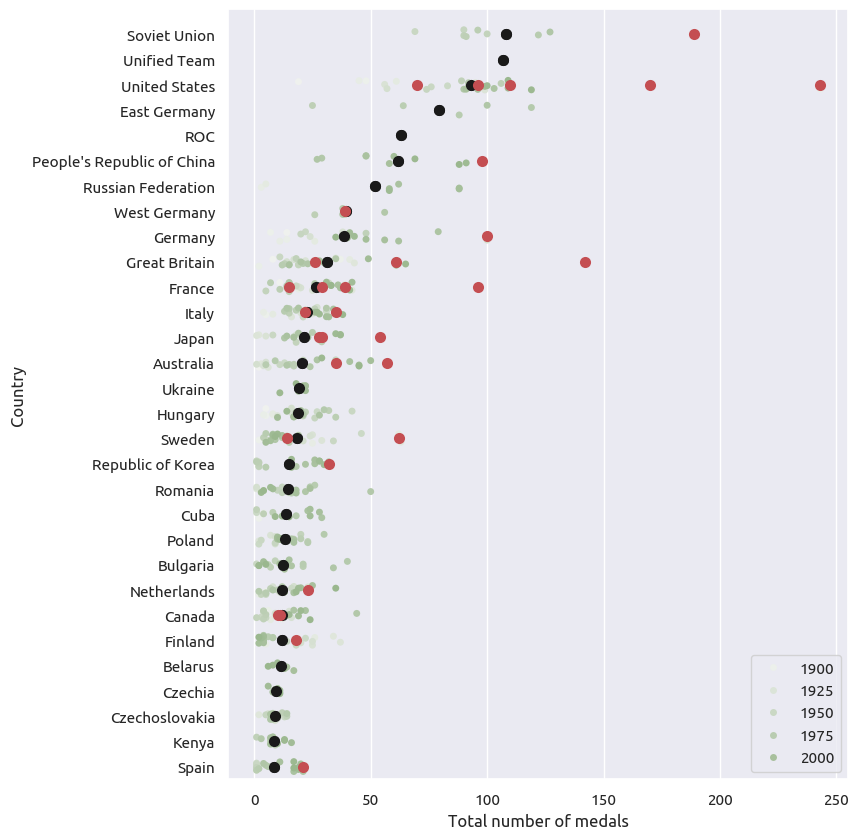

In [35]:
fig, ax = plt.subplots(figsize=(8, 10))

sns.stripplot(x='mean', y='country', data=mean_medals, color='k', s=8, jitter=0, ax=ax)
sns.stripplot(x='total', y='country', hue='year', jitter=.2, data=medals_country_year, ax=ax, palette='light:#9ab78e')
sns.stripplot(x='mean', y='country', data=mean_medals, color='k', s=8, jitter=0, ax=ax)
sns.stripplot(x='total', y='country', data=medals_country_year[medals_country_year['host']], 
              s=8, c='r', jitter=0, ax=ax, label='e', legend=False)
ax.set_ylim(29.5, -1)
#ax.invert_yaxis()
#plt.grid(False)
ax.set_xlabel('Total number of medals')
ax.set_ylabel('Country')

In [36]:
medals_country_year

,noc,total,medal_bronze,medal_gold,medal_silver,year,event_total,country,host
0,GRE,44,16.0,10.0,18.0,1896,117,Greece,True
1,USA,19,2.0,11.0,6.0,1896,117,United States,False
2,GER,14,2.0,7.0,5.0,1896,117,Germany,False
3,FRA,11,2.0,5.0,4.0,1896,117,France,False
4,GBR,8,3.0,2.0,3.0,1896,117,Great Britain,False
...,...,...,...,...,...,...,...,...,...
1312,THA,1,0.0,1.0,0.0,2020,1016,Thailand,False
1313,JOR,1,0.0,0.0,1.0,2020,1016,Jordan,False
1314,CIV,1,1.0,0.0,0.0,2020,1016,Côte d'Ivoire,False
1315,BRN,1,0.0,0.0,1.0,2020,1016,Bahrain,False


(15.5, -0.5)

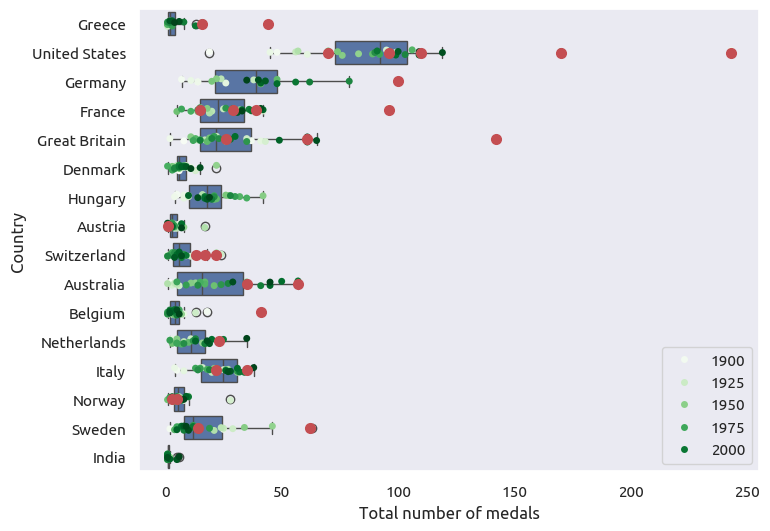

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='total', y='country', data=medals_country_year, orient='h', ax=ax)
sns.stripplot(x='total', y='country', hue='year', data=medals_country_year, ax=ax, palette='Greens')
sns.stripplot(x='total', y='country', data=medals_country_year[medals_country_year['host']], 
              s=8, c='r', jitter=0, ax=ax)
plt.grid(False)
ax.set_xlabel('Total number of medals')
ax.set_ylabel('Country')
ax.set_ylim(15.5, -.5)

(15.5, -0.5)

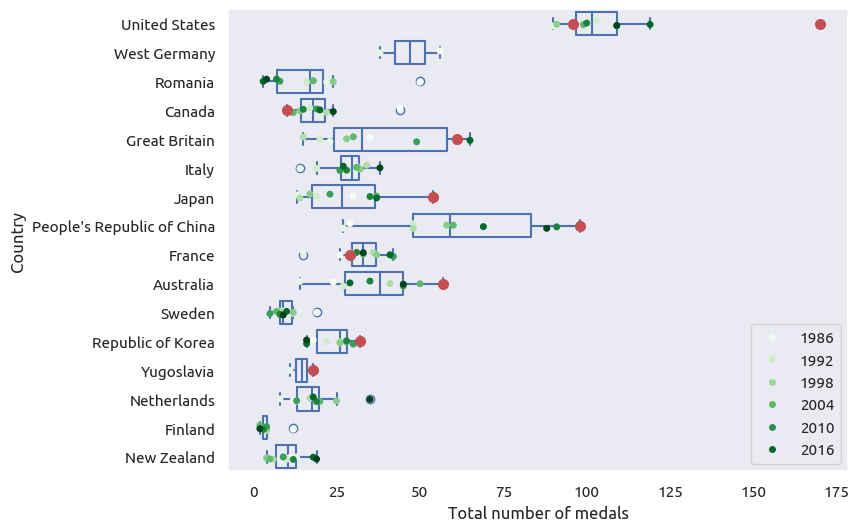

In [38]:
sub_medals_country_year = medals_country_year[medals_country_year['year'] > 1980]
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='total', y='country', data=sub_medals_country_year, orient='h', fill=False, ax=ax)
sns.stripplot(x='total', y='country', hue='year', data=sub_medals_country_year, ax=ax, palette='Greens')
sns.stripplot(x='total', y='country', data=sub_medals_country_year[sub_medals_country_year['host']], 
              s=8, c='r', jitter=0, ax=ax)
plt.grid(False)
ax.set_xlabel('Total number of medals')
ax.set_ylabel('Country')
ax.set_ylim(15.5, -.5)

## Athletes stats

In [39]:
sub_games = games[games['year'] > 2000]
sub_athletes = athletes[athletes['game'].isin(sub_games['game'])]
sub_athletes_group = sub_athletes.groupby('sport')
sports_cat = sports[:10]

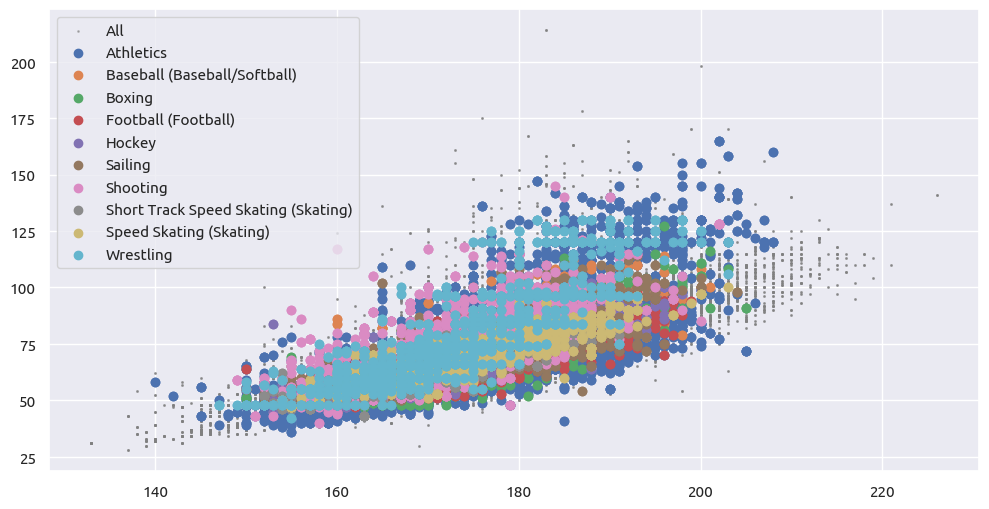

In [40]:
fig, ax = plt.subplots(figsize=(12,6))
plt.scatter(x='height', y='weight', data=sub_athletes, label='All', c='grey', alpha=.5, s=1)
for name, sport in sub_athletes_group:
    if name in sports_cat:
        plt.scatter(x='height', y='weight', data=sport, label=name)
plt.legend()

In [41]:
sub_games = games[(games['year'] > 1800)]
sub_athletes = athletes[(athletes['sport'] == 'Athletics') & (athletes['gender'] == 'Male')]
sub_athletes_group = sub_athletes.groupby('event')

In [42]:
events = [ 'Athletics, 100 metres, Men(Olympic)',
 'Athletics, Marathon, Men(Olympic)']

Text(0.5, 0, 'Weight (kg)')

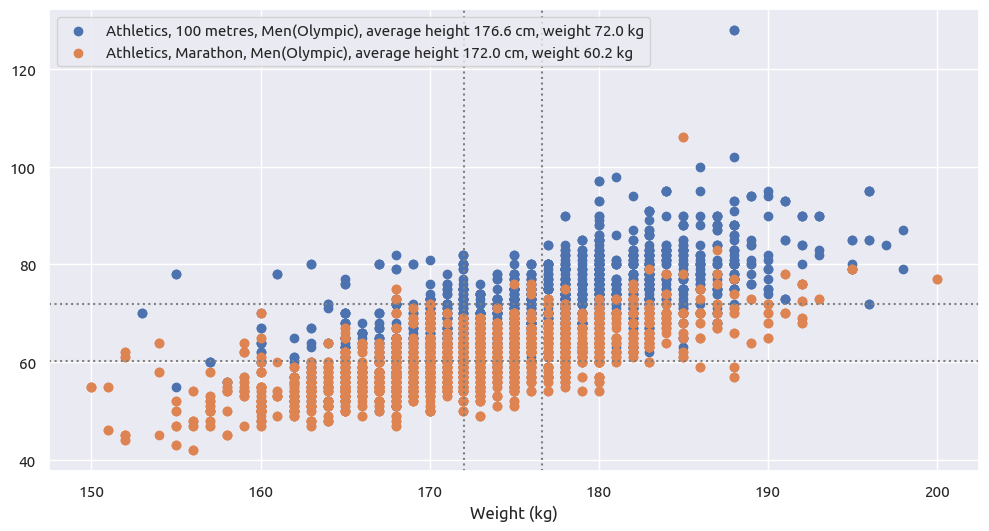

In [43]:
fig, ax = plt.subplots(figsize=(12,6))
#plt.scatter(x='height', y='weight', data=athletes, label='All', c='grey', alpha=.5, s=.5)
for name, group in sub_athletes_group:
    if name in events:
        mean_height = group['height'].mean()
        mean_weight = group['weight'].mean()
        
        plt.axvline(x=mean_height, color='grey', linestyle=':')
        plt.axhline(y=mean_weight, color='grey', linestyle=':')
        
        plt.scatter(x='height', y='weight', data=group, 
                    label=f'{name}, average height {mean_height:.1f} cm, weight {mean_weight:.1f} kg')
                
plt.legend()
plt.xlabel('Height (cm)')
plt.xlabel('Weight (kg)')

In [44]:
sub_games = games[games['year'] > 2000]
sub_athletes = athletes[(athletes['medal'].notnull()) & (athletes['game'].isin(sub_games['game'])) & (athletes['sport'] == 'Swimming (Aquatics)')]
sub_athletes_group = sub_athletes.groupby('medal')

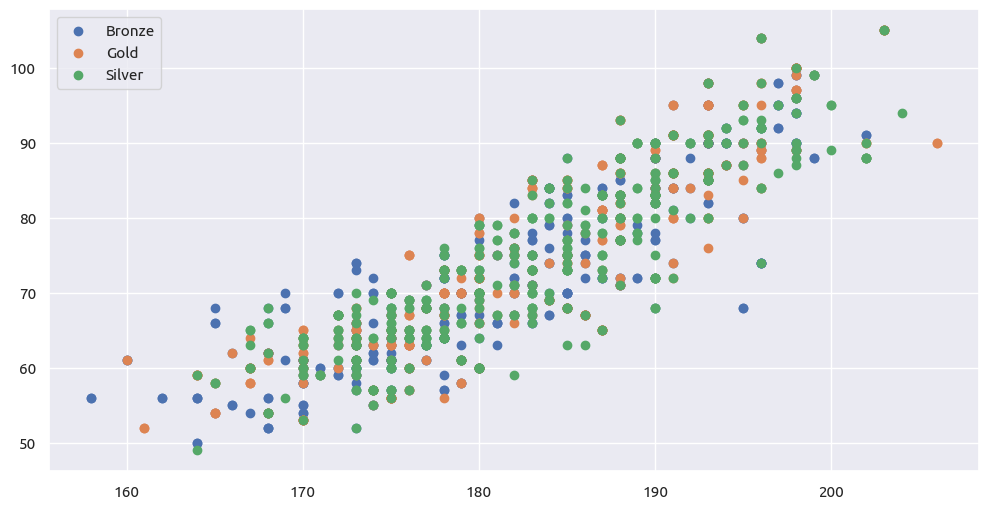

In [45]:
fig, ax = plt.subplots(figsize=(12,6))
#plt.scatter(x='height', y='weight', data=athletes, label='All', c='grey', alpha=.5, s=.5)
for name, group in sub_athletes_group:
    plt.scatter(x='height', y='weight', data=group, label=name)
plt.legend()

## Sports

In [46]:
sub_games = games[games['season'] == 'Summer']
sub_athletes = athletes[athletes['game'].isin(sub_games['game'])]
sub_athletes['year'] = pd.merge(sub_athletes, games, on='game', how='left')['year']
sport_year = sub_athletes.pivot_table(sub_athletes, index=['year','sport'], aggfunc=lambda x: len(x.unique()))
sport_year = sport_year.reset_index()[['year','sport','event']] # keep only these columns
sport_year = to_object(sport_year) # remove category types on strings
sport_year = sport_year.pivot(index='sport', columns='year', values='event')
sport_year.fillna(0, inplace=True)
sport_year['total'] = sport_year[:].sum(axis=1)
sport_year = sport_year.sort_values(by=[2020, 2016, 'total'], ascending=False)
sport_year = sport_year.drop('total', axis=1)
sport_year = sport_year[sport_year[2020] != 0] # remove old sports

Text(141.40625, 0.5, 'Sport')

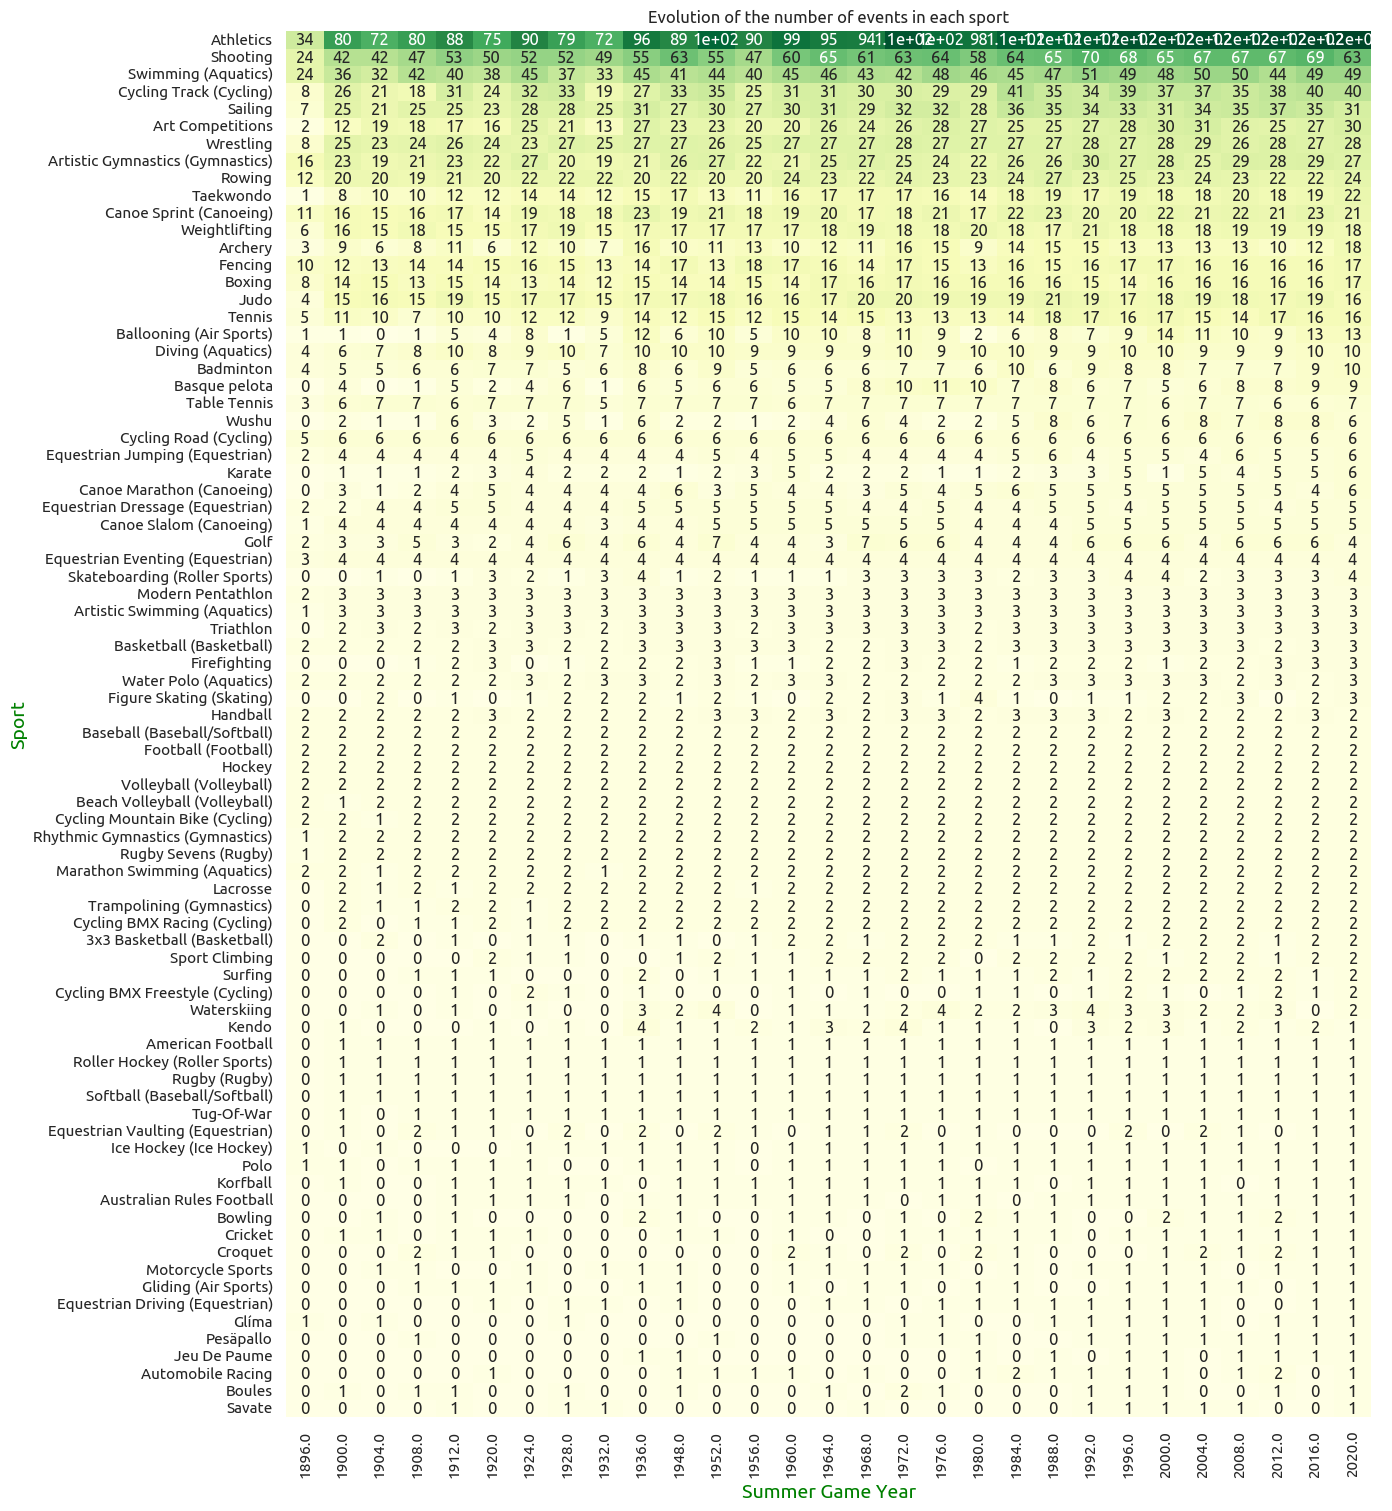

In [47]:
fig, ax = plt.subplots(figsize=(14, 18))
sns.heatmap(sport_year, annot=True, ax=ax, cmap="YlGn", cbar=False)
plt.title('Evolution of the number of events in each sport')
ax.set_xlabel('Summer Game Year', size=14, color="green")
ax.set_ylabel('Sport', size=14, color="green")

In [48]:
sub_games = games[games['season'] == 'Winter']
sub_athletes = athletes[athletes['game'].isin(sub_games['game'])]

sport_year = sub_athletes.pivot_table(sub_athletes, index=['game','sport'], aggfunc=lambda x: len(x.unique()))
sport_year = sport_year.reset_index()[['game','sport','event']] # keep only these columns
sport_year = to_object(sport_year) # remove category types on strings
sport_year = sport_year.pivot(index='sport', columns='game', values='event')
sport_year.fillna(0, inplace=True)
sport_year['total'] = sport_year[:].sum(axis=1)
sport_year = sport_year.sort_values(by=['2022 Winter Olympics', '2018 Winter Olympics', 'total'], ascending=False)
sport_year = sport_year.drop('total', axis=1)
sport_year = sport_year[sport_year['2022 Winter Olympics'] != 0] # remove old sports

Text(141.40624999999997, 0.5, 'Sport')

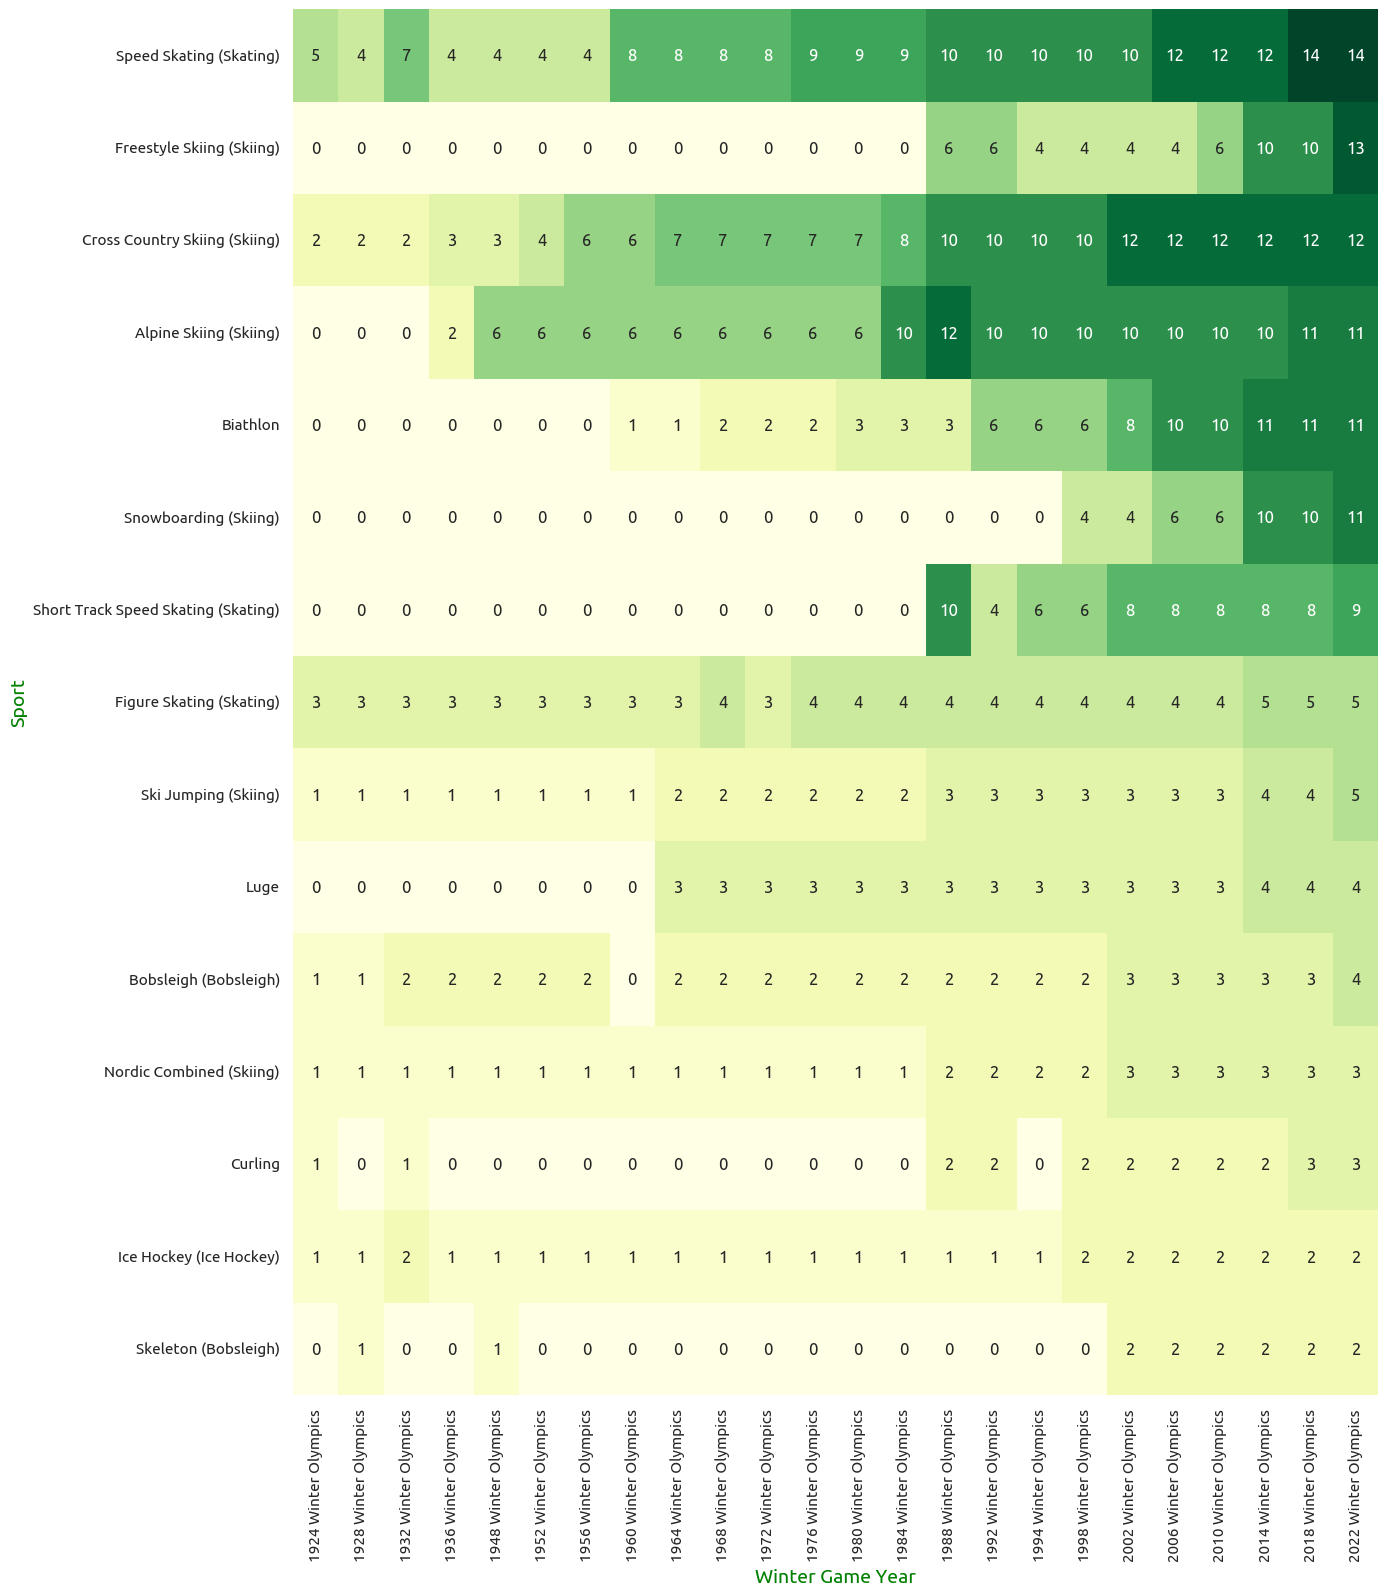

In [49]:
fig, ax = plt.subplots(figsize=(14, 18))
sns.heatmap(sport_year, annot=True, ax=ax, cmap="YlGn", cbar=False)
ax.set_xlabel('Winter Game Year', size=14, color="green")
ax.set_ylabel('Sport', size=14, color="green")

In [50]:
sub_games = games[(games['season'] == 'Summer') & (games['competition'] == 'Olympics') & (games['year'] == 2020)]
sub_athletes = athletes[athletes['game'].isin(sub_games['game']) & (athletes['medal'] == "Gold")]

sub_athletes.drop_duplicates(subset=['event', 'medal'], inplace=True) # Remove team duplicates
sport_year = sub_athletes.pivot_table(sub_athletes, index=['team', 'sport'], aggfunc=lambda x: np.sum(x.notnull()))
sport_year = sport_year.reset_index()[['team','sport','medal']] # keep only these columns
sport_year = to_object(sport_year) # remove category types on strings
sport_year = sport_year.pivot(index='sport', columns='team', values='medal')
sport_year.fillna(0, inplace=True)
sport_year = sport_year.astype('int')
sport_year['Total'] = sport_year[:].sum(axis=1)
sport_year.loc['Total'] = sport_year.sum()
sport_year = sport_year.sort_values(by=['Total'], ascending=False)
sport_year = sport_year.sort_values(by=['Total', 'Athletics'], ascending=False, axis=1)
sport_year = sport_year.drop(sport_year.columns[30:], axis=1)
n = 0
sport_year.loc['Other'] = sport_year[sport_year['Total'] <= n].sum()
sport_year = sport_year[sport_year['Total'] > n] # remove old sports
medals_year = sport_year.div(sport_year['Total'], axis='rows')
medals_year.fillna(0, inplace=True)
#sport_year = sport_year.drop('Total', axis=0) # Row
#medals_year = medals_year.drop('Total', axis=0) # Row

#sport_year = sport_year.drop('Total', axis=1) # Col
#medals_year = medals_year.drop('Total', axis=1) # Col

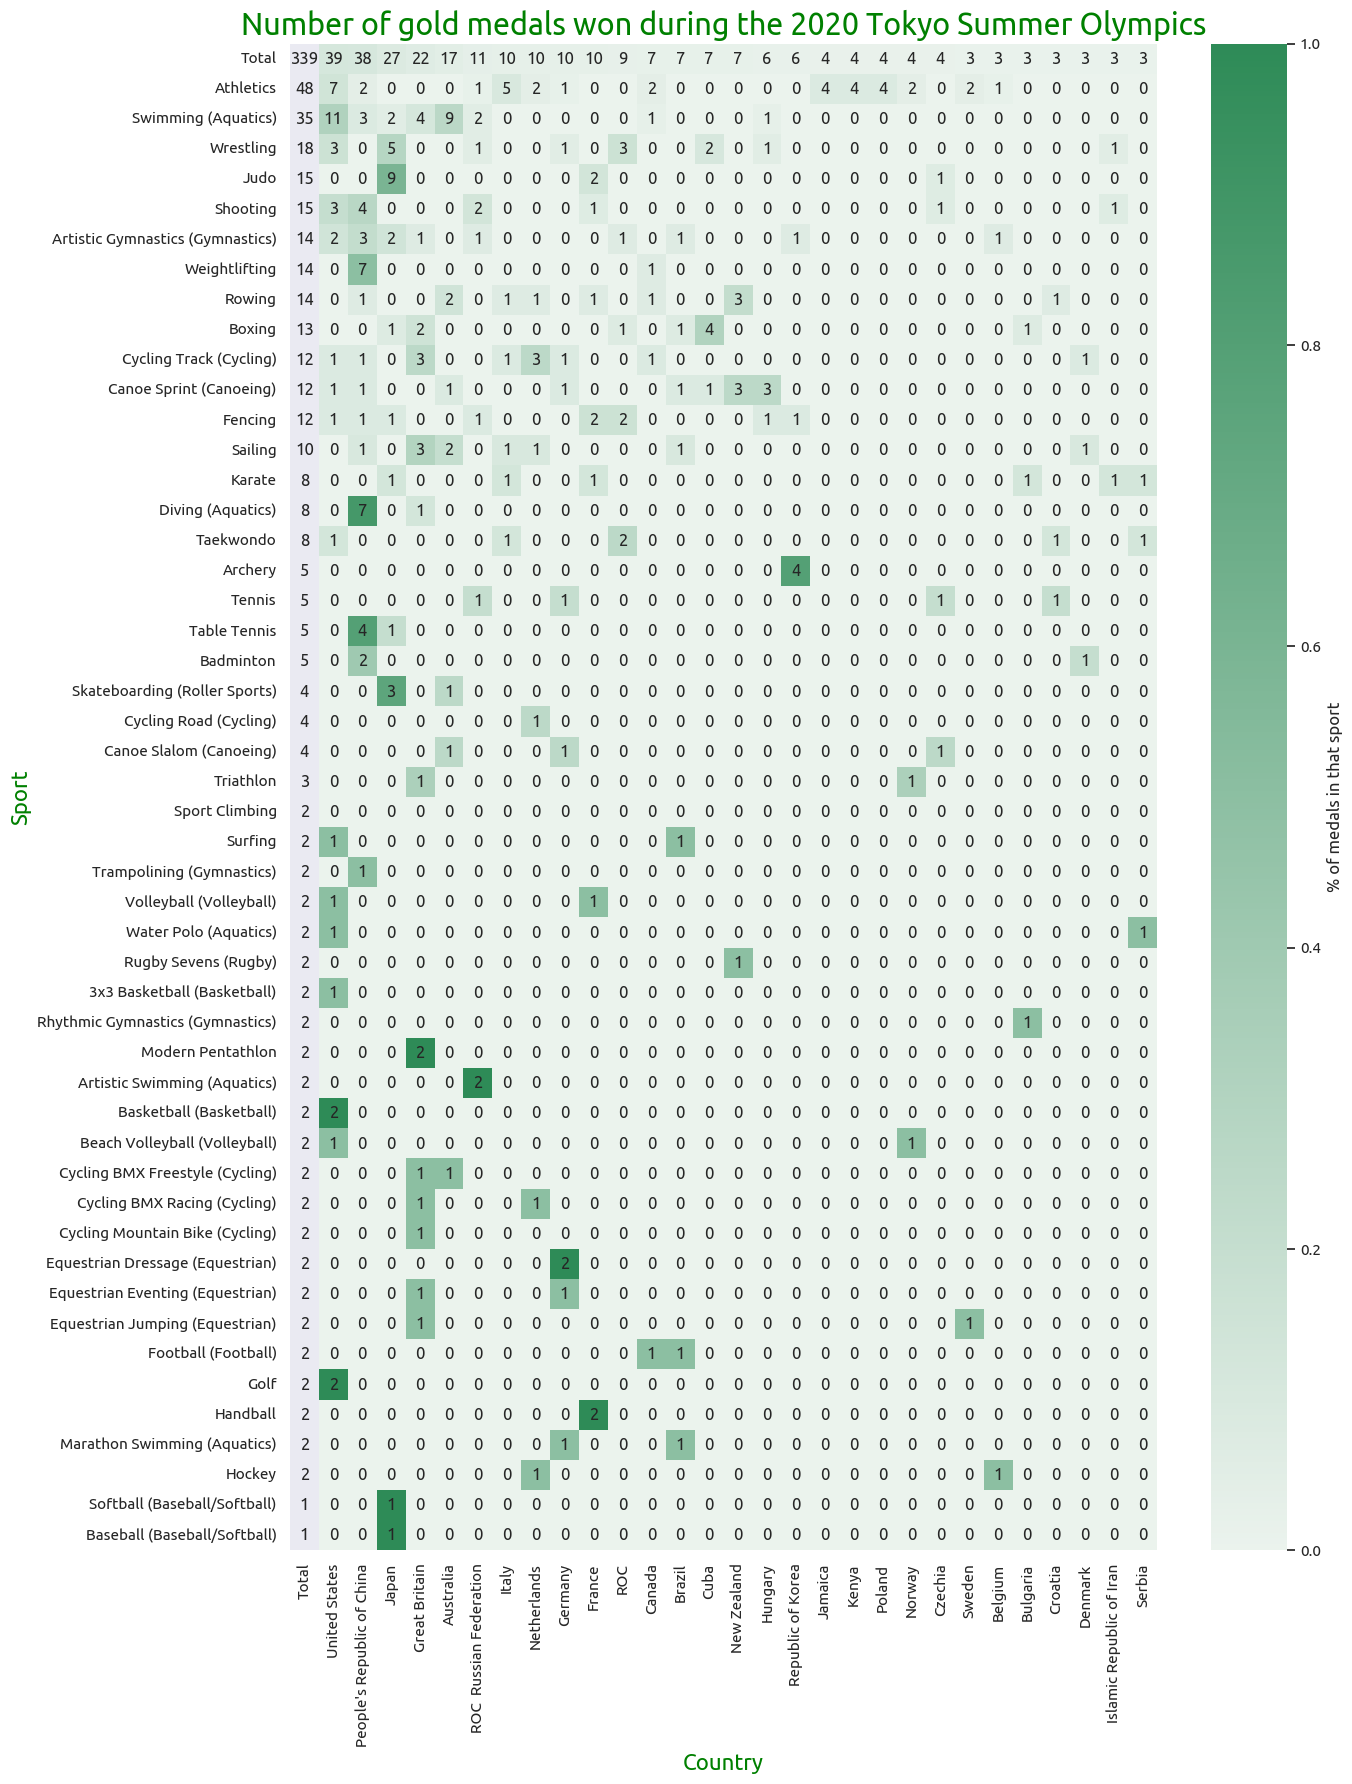

In [51]:
fig, ax = plt.subplots(figsize=(14, 18))
mask = np.zeros(sport_year.shape)
mask[:, 0] = True
sns.heatmap(medals_year, annot=False, ax=ax, mask=mask,
            cmap=sns.light_palette("seagreen", as_cmap=True), cbar=True, 
            cbar_kws={'label': '% of medals in that sport'})
sns.heatmap(sport_year, annot=True, ax=ax, cbar=False, cmap=ListedColormap(['white']), alpha=0, fmt="g")
plt.title('Number of gold medals won during the 2020 Tokyo Summer Olympics', size=22, color="green")
ax.grid(False)
ax.set_xlabel('Country', size=16, color="green")
ax.set_ylabel('Sport', size=16, color="green")
plt.tight_layout()

In [52]:
sport_year.style.background_gradient(subset=sport_year.columns)

team,Total,United States,People's Republic of China,Japan,Great Britain,Australia,ROC Russian Federation,Italy,Netherlands,Germany,France,ROC,Canada,Brazil,Cuba,New Zealand,Hungary,Republic of Korea,Jamaica,Kenya,Poland,Norway,Czechia,Sweden,Belgium,Bulgaria,Croatia,Denmark,Islamic Republic of Iran,Serbia
sport,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Total,339,39,38,27,22,17,11,10,10,10,10,9,7,7,7,7,6,6,4,4,4,4,4,3,3,3,3,3,3,3
Athletics,48,7,2,0,0,0,1,5,2,1,0,0,2,0,0,0,0,0,4,4,4,2,0,2,1,0,0,0,0,0
Swimming (Aquatics),35,11,3,2,4,9,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Wrestling,18,3,0,5,0,0,1,0,0,1,0,3,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
Judo,15,0,0,9,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Shooting,15,3,4,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
Artistic Gymnastics (Gymnastics),14,2,3,2,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
Weightlifting,14,0,7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Rowing,14,0,1,0,0,2,0,1,1,0,1,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [53]:
for row in games.iterrows():
    index, game = row
    if game['year'] < 1980:
        continue
    sub_games = games[(games['season'] == 'Summer') & (games['competition'] == 'Olympics') & (games['year'] == game['year'])]
    sub_athletes = athletes[athletes['game'].isin(sub_games['game']) & (athletes['medal'] == "Gold")]
    sub_athletes.drop_duplicates(subset=['event', 'medal'], inplace=True) # Remove team duplicates
    if sub_athletes.empty:
        continue
    sport_year = sub_athletes.pivot_table(athletes, index=['team', 'sport'], aggfunc=lambda x: np.sum(x.notnull()))
    sport_year = sport_year.reset_index()[['team','sport','medal']] # keep only these columns
    sport_year = to_object(sport_year) # remove category types on strings
    sport_year = sport_year.pivot(index='sport', columns='team', values='medal')
    sport_year.fillna(0, inplace=True)
    sport_year = sport_year.astype('int')
    sport_year['Total'] = sport_year[:].sum(axis=1)
    sport_year.loc['Total'] = sport_year.sum()
    sport_year = sport_year.sort_values(by=['Total'], ascending=False)
    sport_year = sport_year.sort_values(by=['Total', 'Athletics'], ascending=False, axis=1)
    sport_year = sport_year.drop(sport_year.columns[30:], axis=1)
    n = 0
    sport_year.loc['Other'] = sport_year[sport_year['Total'] <= n].sum()
    sport_year = sport_year[sport_year['Total'] > n] # remove old sports
    medals_year = sport_year.div(sport_year['Total'], axis='rows')
    medals_year.fillna(0, inplace=True)
    #sport_year = sport_year.drop('Total', axis=0) # Row
    #medals_year = medals_year.drop('Total', axis=0) # Row

    sport_year = sport_year.drop('Total', axis=1) # Col
    medals_year = medals_year.drop('Total', axis=1) # Col
    
    fig, ax = plt.subplots(figsize=(14, 18))
    sns.heatmap(medals_year, annot=False, ax=ax, cmap=sns.light_palette("seagreen", as_cmap=True), cbar=True, 
                cbar_kws={'label': '% of medals in that sport'})
    sns.heatmap(sport_year, annot=True, ax=ax, cbar=False, cmap=ListedColormap(['white']), alpha=0)
    plt.title(f'Number of gold medals won during the {game["year"]} Summer Olympics', size=22, color="green")
    ax.set_xlabel('Country', size=16, color="green")
    ax.set_ylabel('Sport', size=16, color="green")
    plt.tight_layout()
    plt.savefig(f'graphs/medals-game-country/medals-game-country-{game["year"]}.png')
    plt.clf()

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>